In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import glob
import os
import re
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from scipy import stats
import sklearn
import sklearn.preprocessing
warnings.filterwarnings("ignore")

In [2]:
right_hand = pd.read_csv('HandRight.csv')
right_hand = right_hand.loc[right_hand['Time']-right_hand['Time'][0]>7]
def rename(q):
    q.drop([" # hands"," Hand Type","Time"],axis=1, inplace=True)
    return q.rename(columns={" Position X": " Position X1",
                             " Position Y": " Position Y1",
                             " Position Z":" Position Z1",
                             " Velocity X":" Velocity X1",
                             " Velocity Y":" Velocity Y1",
                             " Velocity Z":" Velocity Z1",
                             " Pitch":" Pitch1",
                             " Roll":" Roll1",
                             " Yaw":" Yaw1",
                             " Wrist Pos X":" Wrist Pos X1",
                             " Wrist Pos Y":" Wrist Pos Y1",
                             " Wrist Pos Z":" Wrist Pos Z1",
                             " Elbow pos X":" Elbow pos X1",
                             " Elbow Pos Y":" Elbow Pos Y1",
                             " Elbow Pos Z":" Elbow Pos Z1",
                             " Grab Strenth":" Grab Strenth1",
                             " Grab Angle":" Grab Angle1",
                             " Pinch Strength":" Pinch Strength1"})
right_hand = rename(right_hand)

# Orgenizing the data for training

In [3]:
names = glob.glob('datasets\Training\*')
training_data  = pd.DataFrame(data=pd.read_csv(glob.glob(str(names[0])+"\*")[-1]))
training_data = training_data.loc[training_data['Time']-training_data['Time'][0]>7]
alone_data = pd.concat([training_data,right_hand],axis=1)
alone_data['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',glob.glob(str(names[0])+"\*")[-1]).group(1)[:-4])

training_data  = pd.DataFrame(data=pd.read_csv(glob.glob(str(names[0])+"\*")[-2]))
csv_t = pd.read_csv(glob.glob(str(names[0])+"\*")[-2])
csv_t = csv_t.loc[csv_t['Time']-csv_t['Time'][0]>7]
temp1 = csv_t.iloc[::2, :]
temp2 = csv_t.iloc[1::2, :]
csv_t = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
csv_t['Type'] =  str(re.search(r'[a-zA-Z].*[0-9](.*)',glob.glob(str(names[0])+"\*")[-2]).group(1)[:-4])
training_data = csv_t

csv_q = pd.read_csv(glob.glob(str(names[0])+"\*")[-3])
csv_q = csv_q.loc[csv_q['Time']-csv_q['Time'][0]>7]
temp1 = csv_q.iloc[::2, :]
temp2 = csv_q.iloc[1::2, :]
csv_q = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
csv_q['Type'] =  str(re.search(r'[a-zA-Z].*[0-9](.*)',glob.glob(str(names[0])+"\*")[-3]).group(1)[:-4])
training_data = pd.concat([training_data, csv_q],sort=False)


for i in list(glob.glob('datasets\Training\*')):
    names1 = glob.glob(str(i)+"\*") # List of names of all participants in the experiment.
    
    csv1 = pd.read_csv(names1[-1])
    csv1 = csv1.loc[csv1['Time']-csv1['Time'][0]>7]
    
    if 'Alone' in names1[-1]:
        csv1['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-1]).group(1)[:-4])
        temp = pd.DataFrame(pd.merge(csv1,right_hand, how='left',on=' Frame ID'))
        alone_data.drop([" Frame ID"],axis=1, inplace=True)
        alone_data = pd.concat([alone_data,temp])
    else:
        temp1 = csv1.iloc[::2, :]
        temp2 = csv1.iloc[1::2, :]
        # csv1 = pd.concat([temp1,temp2],axis=1)
        csv1 = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
        csv1['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-1]).group(1)[:-4])
        training_data = pd.concat([training_data, csv1],sort=False)
        
        
    csv2 = pd.read_csv(names1[-2])
    csv2 = csv2.loc[csv2['Time']-csv2['Time'][0]>7]
    if 'Alone' in names1[-2]:
        csv2['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-2]).group(1)[:-4])
        temp = pd.DataFrame(pd.merge(csv2,right_hand, how='left',on=' Frame ID'))
        alone_data = pd.concat([alone_data,temp])
    else: 
        temp1 = csv2.iloc[::2, :]
        temp2 = csv2.iloc[1::2, :]
        csv2 = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
        csv2['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-2]).group(1)[:-4])
        training_data = pd.concat([training_data, csv2],sort=False)
    
    
    csv3 = pd.read_csv(names1[-3])
    csv3 = csv3.loc[csv3['Time']-csv3['Time'][0]>7]
    if 'Alone' in names1[-3]:
        csv3['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-3]).group(1)[:-4])
        temp = pd.DataFrame(pd.merge(csv3,right_hand, how='left',on=' Frame ID'))
        alone_data = pd.concat([alone_data,temp])
    else:
        temp1 = csv3.iloc[::2, :]
        temp2 = csv3.iloc[1::2, :]
        csv3 = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
        csv3['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-3]).group(1)[:-4])
        training_data = pd.concat([training_data, csv3],sort=False)
    

alone_data.drop([" # hands"," Hand Type","Time"," Frame ID"], axis=1,inplace=True)
# print(training_data)
training_data = training_data.rename(columns={" Position X_x": " Position X",
                             " Position Y_x": " Position Y",
                             " Position Z_x":" Position Z",
                             " Velocity X_x":" Velocity X",
                             " Velocity Y_x":" Velocity Y",
                             " Velocity Z_x":" Velocity Z",
                             " Pitch_x":" Pitch",
                             " Roll_x":" Roll",
                             " Yaw_x":" Yaw",
                             " Wrist Pos X_x":" Wrist Pos X",
                             " Wrist Pos Y_x":" Wrist Pos Y",
                             " Wrist Pos Z_x":" Wrist Pos Z",
                             " Elbow pos X_x":" Elbow pos X",
                             " Elbow Pos Y_x":" Elbow Pos Y",
                             " Elbow Pos Z_x":" Elbow Pos Z",
                             " Grab Strenth_x":" Grab Strenth",
                             " Grab Angle_x":" Grab Angle",
                             " Pinch Strength_x":" Pinch Strength",
                             
                             " Position X_y": " Position X1",
                             " Position Y_y": " Position Y1",
                             " Position Z_y":" Position Z1",
                             " Velocity X_y":" Velocity X1",
                             " Velocity Y_y":" Velocity Y1",
                             " Velocity Z_y":" Velocity Z1",
                             " Pitch_y":" Pitch1",
                             " Roll_y":" Roll1",
                             " Yaw_y":" Yaw1",
                             " Wrist Pos X_y":" Wrist Pos X1",
                             " Wrist Pos Y_y":" Wrist Pos Y1",
                             " Wrist Pos Z_y":" Wrist Pos Z1",
                             " Elbow pos X_y":" Elbow pos X1",
                             " Elbow Pos Y_y":" Elbow Pos Y1",
                             " Elbow Pos Z_y":" Elbow Pos Z1",
                             " Grab Strenth_y":" Grab Strenth1",
                             " Grab Angle_y":" Grab Angle1",
                             " Pinch Strength_y":" Pinch Strength1"})
training_data = pd.concat([training_data,alone_data])

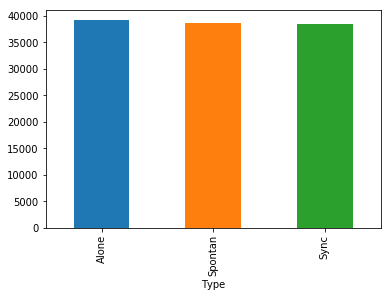

In [4]:
training_data.groupby('Type')[' Yaw'].count().plot(kind='bar')

By the graph above we can see that a null classefier would have an accuracy of about 33%

In [5]:
training_data.drop([" # hands_x",' # hands_y',' Frame ID',' Hand Type_x',' Hand Type_y','Time_x', 'Time_y'],axis=1, inplace = True)
training_data['Type'].replace({'Alone':1,'Spontan':2,'Sync':3},inplace=True)
training_data = training_data.dropna(how = 'any')

# Orgenizing the data for testing

In [6]:
names = glob.glob('datasets\Validation\*')
testing_data  = pd.DataFrame(data=pd.read_csv(glob.glob(str(names[0])+"\*")[-1]))
testing_data = testing_data.loc[testing_data['Time']-testing_data['Time'][0]>7]
alone_data = pd.concat([testing_data,right_hand],axis=1)
alone_data['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',glob.glob(str(names[0])+"\*")[-1]).group(1)[:-4])

testing_data  = pd.DataFrame(data=pd.read_csv(glob.glob(str(names[0])+"\*")[-2]))
csv_t = pd.read_csv(glob.glob(str(names[0])+"\*")[-2])
csv_t = csv_t.loc[csv_t['Time']-csv_t['Time'][0]>7]
temp1 = csv_t.iloc[::2, :]
temp2 = csv_t.iloc[1::2, :]
csv_t = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
csv_t['Type'] =  str(re.search(r'[a-zA-Z].*[0-9](.*)',glob.glob(str(names[0])+"\*")[-2]).group(1)[:-4])
testing_data = csv_t

csv_q = pd.read_csv(glob.glob(str(names[0])+"\*")[-3])
csv_q = csv_q.loc[csv_q['Time']-csv_q['Time'][0]>7]
temp1 = csv_q.iloc[::2, :]
temp2 = csv_q.iloc[1::2, :]
csv_q = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
csv_q['Type'] =  str(re.search(r'[a-zA-Z].*[0-9](.*)',glob.glob(str(names[0])+"\*")[-3]).group(1)[:-4])
testing_data = pd.concat([testing_data, csv_q],sort=False)
for i in list(glob.glob('datasets\Validation\*')):
    names1 = glob.glob(str(i)+"\*") # List of names of all participants in the experiment.
    
    csv1 = pd.read_csv(names1[-1])
    csv1 = csv1.loc[csv1['Time']-csv1['Time'][0]>7]
    
    if 'Alone' in names1[-1]:
        csv1['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-1]).group(1)[:-4])
        temp = pd.DataFrame(pd.merge(csv1,right_hand, how='left',on=' Frame ID'))
        alone_data.drop([" Frame ID"],axis=1, inplace=True)
        alone_data = pd.concat([alone_data,temp])
    else:
        temp1 = csv1.iloc[::2, :]
        temp2 = csv1.iloc[1::2, :]
        csv1 = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
        csv1['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-1]).group(1)[:-4])
        testing_data = pd.concat([testing_data, csv1],sort=False)
        
        
    csv2 = pd.read_csv(names1[-2])
    csv2 = csv2.loc[csv2['Time']-csv2['Time'][0]>7]
    if 'Alone' in names1[-2]:
        csv2['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-2]).group(1)[:-4])
        temp = pd.DataFrame(pd.merge(csv2,right_hand, how='left',on=' Frame ID'))
        alone_data = pd.concat([alone_data,temp])
    else: 
        temp1 = csv2.iloc[::2, :]
        temp2 = csv2.iloc[1::2, :]
        csv2 = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
        csv2['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-2]).group(1)[:-4])
        testing_data = pd.concat([testing_data, csv2],sort=False)
    
    
    csv3 = pd.read_csv(names1[-3])
    csv3 = csv3.loc[csv3['Time']-csv3['Time'][0]>7]
    
    if 'Alone' in names1[-3]:
        csv3['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-3]).group(1)[:-4])
        temp = pd.DataFrame(pd.merge(csv3,right_hand, how='left',on=' Frame ID'))
        alone_data = pd.concat([alone_data,temp])
    else:
        temp1 = csv3.iloc[::2, :]
        temp2 = csv3.iloc[1::2, :]
        csv3 = pd.DataFrame(pd.merge(temp1,temp2, how='left',on=' Frame ID'))
        csv3['Type'] = str(re.search(r'[a-zA-Z].*[0-9](.*)',names1[-3]).group(1)[:-4])
        testing_data = pd.concat([testing_data, csv3],sort=False)


alone_data.drop([" # hands"," Hand Type","Time"," Frame ID"], axis=1,inplace=True)
testing_data.drop(["Time_x"," Frame ID"," Hand Type_x"," # hands_x","Time_y"," Hand Type_y"," # hands_y"],axis=1,inplace=True)
testing_data = testing_data.rename(columns={" Position X_x": " Position X",
                             " Position Y_x": " Position Y",
                             " Position Z_x":" Position Z",
                             " Velocity X_x":" Velocity X",
                             " Velocity Y_x":" Velocity Y",
                             " Velocity Z_x":" Velocity Z",
                             " Pitch_x":" Pitch",
                             " Roll_x":" Roll",
                             " Yaw_x":" Yaw",
                             " Wrist Pos X_x":" Wrist Pos X",
                             " Wrist Pos Y_x":" Wrist Pos Y",
                             " Wrist Pos Z_x":" Wrist Pos Z",
                             " Elbow pos X_x":" Elbow pos X",
                             " Elbow Pos Y_x":" Elbow Pos Y",
                             " Elbow Pos Z_x":" Elbow Pos Z",
                             " Grab Strenth_x":" Grab Strenth",
                             " Grab Angle_x":" Grab Angle",
                             " Pinch Strength_x":" Pinch Strength",
                             
                             " Position X_y": " Position X1",
                             " Position Y_y": " Position Y1",
                             " Position Z_y":" Position Z1",
                             " Velocity X_y":" Velocity X1",
                             " Velocity Y_y":" Velocity Y1",
                             " Velocity Z_y":" Velocity Z1",
                             " Pitch_y":" Pitch1",
                             " Roll_y":" Roll1",
                             " Yaw_y":" Yaw1",
                             " Wrist Pos X_y":" Wrist Pos X1",
                             " Wrist Pos Y_y":" Wrist Pos Y1",
                             " Wrist Pos Z_y":" Wrist Pos Z1",
                             " Elbow pos X_y":" Elbow pos X1",
                             " Elbow Pos Y_y":" Elbow Pos Y1",
                             " Elbow Pos Z_y":" Elbow Pos Z1",
                             " Grab Strenth_y":" Grab Strenth1",
                             " Grab Angle_y":" Grab Angle1",
                             " Pinch Strength_y":" Pinch Strength1"})
testing_data = pd.concat([testing_data,alone_data])
testing_data = testing_data.dropna(how = 'any')
testing_data['Type'].replace({'Alone':1,'Spontan':2,'Sync':3},inplace=True)

In [7]:
X_train = training_data.loc[:, training_data.columns != 'Type']
y_train = training_data[["Type"]]
X_test = testing_data.loc[:, testing_data.columns != 'Type']
y_test = testing_data[["Type"]]
X = pd.concat([X_train,X_test],sort=False)

In [8]:
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
fit = pca.fit(X)
print(fit.explained_variance_ratio_)

[0.54794818 0.11743803 0.07973622 0.04860914 0.0349851  0.03254595
 0.02897448 0.02776472 0.01601006 0.01523925 0.01206009 0.01051309
 0.00993479 0.00508586 0.00412934]


In [9]:
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
# y_train=y_train.astype('int')
adaboost.fit(X_train,y_train)
y_pred = adaboost.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of AdaBoost For The Given Dataset : ", accuracy)
print("\nF-score wighted : ", f1_score(y_test,y_pred,average='weighted'))


Accuracy Of AdaBoost For The Given Dataset :  0.6319319381481712

F-score wighted :  0.6354599089187998


In [10]:
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [11]:
dtc = sklearn.tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
my_score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("score: ",my_score)

score:  0.6487300503011861


In [12]:
my_scaler = sklearn.preprocessing.StandardScaler()
my_scaler.fit(X_train)
X_train = my_scaler.transform(X_train)
X_test = my_scaler.transform(X_test)
classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', score)

Accuracy : 0.600074520275725
